<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min_dalle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

### Install

In [ ]:
! pip install min-dalle
! nvidia-smi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for min-dalle: filename=min_dalle-0.2.27-py3-none-any.whl size=11247 sha256=788e2010694dd0085a6352e07de88d108d171e4f04457575a45e5b02c7914822
  Stored in directory: /root/.cache/pip/wheels/da/00/12/9761a7506eb7e3e1f4ca383cd37e426dd146eea5bc5cb016f3
Successfully built min-dalle
Tue Jul  5 09:43:32 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P10

### Load Model

In [1]:
from PIL import Image
from IPython.display import update_display
import numpy
from math import log2
from min_dalle import MinDalle

model = MinDalle(is_mega=True, is_reusable=True)

initializing MinDalle
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


### Generate Images

- `grid_size` Size of the image grid.  3x3 works best when displaying intermediate outputs.  4x4 has been tested to work on T4 and P100 with intermediate outputs off

- `intermediate_outputs` Whether to show intermediate output.  Adds a small delay and increases memory usage.

- `supercondition_factor` Higher values result in better agreement with the text but a narrower variety of generated images

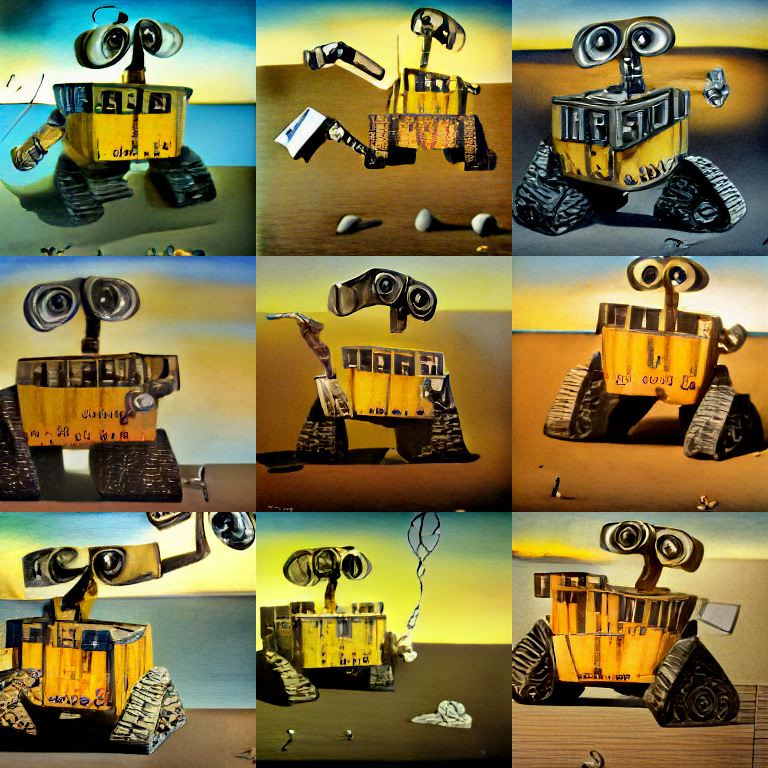

CPU times: user 34.2 s, sys: 503 ms, total: 34.7 s
Wall time: 35.1 s


In [2]:
%%time

text = "Dali painting of WALL·E" #@param {type:"string"}
intermediate_outputs = True #@param {type:"boolean"}
grid_size = 3 #@param {type:"integer"}
supercondition_factor = 8 #@param ["2", "4", "8", "16", "32", "64"] {type:"raw"}
log2_mid_count = 3 if intermediate_outputs else 0

image_stream = model.generate_image_stream(
    text=text,
    seed=-1,
    grid_size=grid_size,
    log2_mid_count=log2_mid_count,
    log2_supercondition_factor=log2(supercondition_factor)
)

is_first = True
for image in image_stream:
    display_image = display if is_first else update_display
    display_image(image, display_id=1)
    is_first = False